## One-Way ANOVA
Let's create the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import random
import pingouin as pg

In [6]:
transport = 'Walking Walking Walking Walking Walking Walking Walking Walking Walking Walking Public Public Public Public Public Public Public Public Public Public Private Private Private Private Private Private Private Private Private Private'.split()
len(transport)

30

In [7]:
transportdf = pd.concat([pd.Series(transport, name='Transportation'),
                       pd.Series([5,4,5,6,5,3,2,4,5,5,7,7,5,6,4,6,5,5,6,7,5,4,5,6,6,5,5,5,7,7], name='Study Hour')], axis=1)
transportdf.head()

,Transportation,Study Hour
0,Walking,5
1,Walking,4
2,Walking,5
3,Walking,6
4,Walking,5


In [8]:
transportdf.sample(5)

,Transportation,Study Hour
6,Walking,2
16,Public,5
8,Walking,5
13,Public,6
7,Walking,4


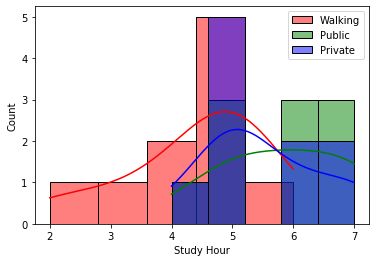

In [10]:
sns.histplot(transportdf[transportdf['Transportation'] == 'Walking']['Study Hour'], color='red', kde=True, label='Walking')
sns.histplot(transportdf[transportdf['Transportation'] == 'Public']['Study Hour'], color='green', kde=True, label='Public')
sns.histplot(transportdf[transportdf['Transportation'] == 'Private']['Study Hour'], color='blue', kde=True, label='Private')
plt.legend()
plt.show()

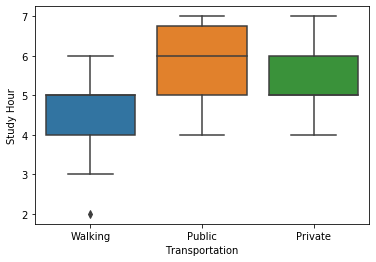

In [12]:
sns.boxplot(x='Transportation', y='Study Hour', data=transportdf)
plt.show()

In [14]:
for i in transportdf['Transportation'].unique():
    print(f"Mean of Study Hour {i}: {transportdf[transportdf['Transportation'] == i]['Study Hour'].mean()}")

Mean of Study Hour Walking: 4.4
Mean of Study Hour Public: 5.8
Mean of Study Hour Private: 5.5


H0: mu_walking = mu_public = mu_private

Ha: mu_walking != mu_public != mu_private

In [15]:
alpha = 0.05
fstats, pvalue = stats.stats.f_oneway(transportdf[transportdf['Transportation'] == 'Walking']['Study Hour'],
                    transportdf[transportdf['Transportation'] == 'Public']['Study Hour'],
                    transportdf[transportdf['Transportation'] == 'Private']['Study Hour'])

F_onewayResult(statistic=4.809836065573772, pvalue=0.0163405142361861)

The P-value is lower than our significant level 0.05, it means wehave enough evidence to reject the Null Hypothesis. So,at least one pair of the population are not equal

MSSB = Mean Sum of Squares Between The Group

MSSW = Mean Sum of Squares Within The Group

## __Manual Calculation__

In [16]:
transportdf

,Transportation,Study Hour
0,Walking,5
1,Walking,4
2,Walking,5
3,Walking,6
4,Walking,5
5,Walking,3
6,Walking,2
7,Walking,4
8,Walking,5
9,Walking,5


In [19]:
transportdf['Study Hour'].mean()

5.233333333333333

In [17]:
transportdf.pivot_table(index='Transportation', aggfunc='mean')

,Study Hour
Transportation,
Private,5.5
Public,5.8
Walking,4.4


In [18]:
transportdf['Transportation'].value_counts()

Private    10
Walking    10
Public     10
Name: Transportation, dtype: int64

## __F-Test (One Way Anova)__

$ \displaystyle F_{test} = \frac{MSS_{B}}{MSS_{W}} $

## __Calculate Mean Sum of Squared Between The Group__

\begin{align}
SS_{between} = \sum_{j=1}^{k} n_j (\bar{x}_{.j}-\bar{x}_{G})^2 = n_1 (\bar{x}_{.1}-\bar{x}_{G})^2 + n_2 (\bar{x}_{.2}-\bar{x}_{G})^2 + n_3 (\bar{x}_{.3}-\bar{x}_{G})^2 
\end{align}

\begin{align}
MS_{between} = \frac{SS_{between}} {k-1}
\end{align}

\begin{gather*}
n_1, n_2, n_3 = 10 \\
\bar{x}_{.1}, \bar{x}_{.2}, \bar{x}_{.3} = 5.4, 5.8, 4.4 \\
\bar{x} = 5.2333333.. \\
k =3 
\end{gather*}


In [21]:
x_bar1 = transportdf[transportdf['Transportation'] == 'Public']['Study Hour'].mean()
x_bar2 = transportdf[transportdf['Transportation'] == 'Private']['Study Hour'].mean()
x_bar3 = transportdf[transportdf['Transportation'] == 'Walking']['Study Hour'].mean()
n1,n2,n3 = 10,10,10
x_barG = transportdf['Study Hour'].mean()
k = 3

In [22]:
SSb = n1*(x_bar1 - x_barG)**2 + n2*(x_bar2 - x_barG)**2 + n3*(x_bar3 - x_barG)**2
SSb

10.866666666666658

In [23]:
MSSb = SSb / (k-1)
MSSb

5.433333333333329

## __Calculate Mean Sum of Squared Within The Group__

\begin{align}
SS_{within} = \sum_{i=1}^{n_1} (x_{i1}-\bar{x}_{.1})^2 + \sum_{i=1}^{n_2} (x_{i2}-\bar{x}_{.2})^2 + \sum_{i=1}^{n_3} (x_{i3}-\bar{x}_{.3})^2
\end{align}

\begin{align}
MS_{within} = \frac{SS_{within}}{n-k}
\end{align}

\begin{equation}
\begin{split}
SS_{within} & =  (5-5.5)^2 + ... + (7-5.5)^2 + (7-5.8)^2 + ... + (7-5.8)^2 + (5-4.4)^2 + ... + (5-4.4)^2\\
             & = 9.6 + 8.5 + 12.39 \\
             & = 30.5
\end{split}
\end{equation}

In [24]:
sum_g1 = sum([(i-x_bar1)**2 for i in transportdf[transportdf['Transportation']=='Public']['Study Hour']])
sum_g2 = sum([(i-x_bar2)**2 for i in transportdf[transportdf['Transportation']=='Private']['Study Hour']])
sum_g3 = sum([(i-x_bar3)**2 for i in transportdf[transportdf['Transportation']=='Walking']['Study Hour']])
SSw = sum_g1 + sum_g2 + sum_g3
SSw

30.5

In [25]:
n = len(transportdf)
MSSw = SSw/(n-k)
MSSw

1.1296296296296295

## __Calculate F Statistic__

$ \displaystyle F_{test} = \frac{MSS_{B}}{MSS_{W}} $

In [26]:
Fstat = MSSb / MSSw
Fstat

4.8098360655737675

## __Calculate DFb (Degree Of Freedom Between)__

In [27]:
dfb = k - 1
dfb

2

## __Calculate DFw (Degree Of Freedom Within)__

In [28]:
dfw = n-k
dfw

27

## __Hypothesis__

$ \displaystyle H0: \mu_{1} = \mu_2 = \mu_3 $

$ \displaystyle H1: \mu_{1} \neq \mu_2 \neq \mu_3 $

$ Ci = 95% $ 
$ \alpha = 0.05 $

In [40]:
print('critical value F_alpha', stats.stats.f.ppf(1-0.05,dfb,dfw))
print('F stats', Fstat)

critical value F_alpha 3.3541308285291986
F stats 4.8098360655737675


\begin{align}
F_{stat}  = 4.80983 > F_{\alpha,db_1,db_2} = 3.3541
\end{align}

In [43]:
print('p-value', stats.stats.f.sf(Fstat,dfb,dfw))
print('alpha', 0.05)

p-value 0.01634051423618613
alpha 0.05


In [46]:
alpha = 0.05
fstats, pvalue = stats.stats.f_oneway(
                    transportdf[transportdf['Transportation'] == 'Private']['Study Hour'],
                    transportdf[transportdf['Transportation'] == 'Walking']['Study Hour'],
                    transportdf[transportdf['Transportation'] == 'Public']['Study Hour'],)
# urutan tidak berpengaruh
fstats, pvalue

(4.809836065573772, 0.0163405142361861)